#### ***Session 1 : Library Support***

In [14]:
import pandas as pd                
import numpy as np                    
import matplotlib.pyplot as plt            
import seaborn as sns      
from nltk.tokenize import word_tokenize    

pd.set_option('display.max_rows',100) 
pd.set_option('display.max_columns',100)

plt.style.use('fivethirtyeight')    

#### ***Session 2 : Import / Load Dataset***

In [15]:
jobs=pd.read_csv('gsearch_jobs_final.csv')

#### ***Session 3 : Understand the Dataset***

*i) Brief Summary Information about the Dataset*

In [16]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251838 entries, 0 to 251837
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           251838 non-null  int64  
 1   index                251838 non-null  int64  
 2   title                251838 non-null  object 
 3   company_name         251838 non-null  object 
 4   location             251667 non-null  object 
 5   via                  251766 non-null  object 
 6   description          251838 non-null  object 
 7   extensions           251838 non-null  object 
 8   job_id               251838 non-null  object 
 9   thumbnail            137898 non-null  object 
 10  posted_at            251838 non-null  object 
 11  schedule_type        250423 non-null  object 
 12  work_from_home       111679 non-null  object 
 13  salary               45856 non-null   object 
 14  search_term          251838 non-null  object 
 15  date_time        

*ii) Statistical Summary of the Numerical Features of the Dataset*

In [17]:
jobs.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,251838.000000,251838.000000,0.0,45856.000000,43208.000000,43208.000000,29649.000000,16121.000000,45856.000000
mean,126051.323255,1122.464263,NaN,35753.889147,30111.401499,42359.685736,43.115246,101588.665296,93839.811165
std,72846.044494,703.311104,NaN,51680.266651,43554.797606,61224.949200,23.032252,30213.246020,42872.173999
min,0.000000,0.000000,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000
25%,62959.250000,533.000000,NaN,31.000000,18.460000,45.000000,25.000000,83830.000000,63440.000000
50%,126008.500000,1077.000000,NaN,57.500000,42.000000,75.000000,37.500000,96500.000000,93600.000000
75%,189184.750000,1644.000000,NaN,87500.000000,75000.000000,100000.000000,57.500000,112500.000000,119600.000000
max,252261.000000,3455.000000,NaN,288000.000000,230000.000000,346000.000000,300.000000,288000.000000,624000.000000


*iii) Check Data Types*

In [18]:
jobs.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

*iv) Check for Null Values*

In [19]:
jobs.isnull().sum()

Unnamed: 0                  0
index                       0
title                       0
company_name                0
location                  171
via                        72
description                 0
extensions                  0
job_id                      0
thumbnail              113940
posted_at                   0
schedule_type            1415
work_from_home         140159
salary                 205982
search_term                 0
date_time                   0
search_location             0
commute_time           251838
salary_pay             205982
salary_rate            205982
salary_avg             205982
salary_min             208630
salary_max             208630
salary_hourly          222189
salary_yearly          235717
salary_standardized    205982
description_tokens          0
dtype: int64

In [20]:
total_null=jobs.isna().sum().sum()
total=np.product(jobs.shape)
perc=round((total_null/total)*100,2)
print(f'Total Missing Values : {total_null:,.0f}')
print(f'Total Records : {total:,.0f}')
print(f'Percentage of Missing Values : {perc}%')

Total Missing Values : 2,412,671
Total Records : 6,799,626
Percentage of Missing Values : 35.48%


*v) Check for Duplicate Entries*

In [21]:
jobs.duplicated().sum()

0

#### ***Session 4 : Data Cleaning***

***i) Reload Dataset with Index Column set to 0***

In [22]:
jobs=pd.read_csv('gsearch_jobs_final.csv',index_col=0)

In [23]:
jobs.iloc[:2]

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-04 03:00:13.797776,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


***ii) Filter Useful Features***

In [24]:
jobs.drop(
    columns=['description','index',
    'extensions', 'job_id', 'thumbnail',
    'work_from_home','salary_pay',
    'commute_time','salary_rate',
    'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
    'salary_yearly', 'salary_standardized','salary_pay'],axis=1,inplace=True)

In [25]:
jobs.iloc[:2]

,title,company_name,location,via,posted_at,schedule_type,salary,search_term,date_time,search_location,description_tokens
0,Data Analyst,Meta,Anywhere,via LinkedIn,15 hours ago,Full-time,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,"['tableau', 'r', 'python', 'sql']"
1,Data Analyst,ATC,United States,via LinkedIn,12 hours ago,Full-time,NaN,data analyst,2023-08-04 03:00:13.797776,United States,[]


***iii) Rename Columns and Extra Spaces***

In [26]:
jobs.rename(columns={
    'title':'job_title',
    'via':'platform',
    'posted_at':'posted',
    'schedule_type':'contract_type',
    'description_tokens':'job_tools',
    'date_time':'date',
    'SALARY':'salary'
},inplace=True)

In [27]:
jobs['location']=jobs['location'].str.strip()

In [28]:
jobs.iloc[:2]

,job_title,company_name,location,platform,posted,contract_type,salary,search_term,date,search_location,job_tools
0,Data Analyst,Meta,Anywhere,via LinkedIn,15 hours ago,Full-time,101K–143K a year,data analyst,2023-08-04 03:00:13.797776,United States,"['tableau', 'r', 'python', 'sql']"
1,Data Analyst,ATC,United States,via LinkedIn,12 hours ago,Full-time,NaN,data analyst,2023-08-04 03:00:13.797776,United States,[]


***iv) Convert Date data type from Object to DateTime***

In [29]:
jobs['date']=pd.to_datetime(jobs['date']).dt.date
jobs['date']=pd.to_datetime(jobs['date'])

In [30]:
jobs['date'].iloc[:5]

0   2023-08-04
1   2023-08-04
2   2023-08-04
3   2023-08-04
4   2023-08-04
Name: date, dtype: datetime64[ns]

***v) Salary***

*i) Split Salary into Yearly and Hourly*

In [31]:
jobs['salary_yearly']=np.where(jobs['salary'].str.contains('year'),jobs['salary'],np.NAN)
jobs['salary_hourly']=np.where(jobs['salary'].str.contains('hour'),jobs['salary'],np.NAN)

*ii) Replace any occurence of K with 000 and any other remaining strings to make Feature Numeric.<br/>Split into Minimum and Maximum then Average to get Average Salary*

*<font color='lightgreen'>1) Yearly Salary</font>*

In [32]:
jobs['salary_yearly']=jobs['salary_yearly'].str.replace('K','000').str.replace('a year','').str.replace(',','').str.replace('.','')

In [33]:
jobs[['salary_yearly_min','salary_yearly_max']]=jobs['salary_yearly'].str.split('–',expand=True)

In [34]:
jobs['salary_yearly_min']=pd.to_numeric(jobs['salary_yearly_min']).astype('Int64')
jobs['salary_yearly_max']=pd.to_numeric(jobs['salary_yearly_max']).astype('Int64')

In [35]:
jobs[['salary_yearly_min','salary_yearly_max']].iloc[:5]

,salary_yearly_min,salary_yearly_max
0,101000,143000
1,<NA>,<NA>
2,<NA>,<NA>
3,<NA>,<NA>
4,90000,110000


*<font color='lightgreen'>2) Hourly Salary</font>*

In [36]:
jobs['salary_hourly']=jobs['salary_hourly'].str.replace('an hour','').str.replace('.','')

In [37]:
jobs[['salary_hourly_min','salary_hourly_max']]=jobs['salary_hourly'].str.split('–',expand=True)

In [38]:
jobs['salary_hourly_min']=pd.to_numeric(jobs['salary_hourly_min']).astype('Int64')
jobs['salary_hourly_max']=pd.to_numeric(jobs['salary_hourly_max']).astype('Int64')

In [39]:
jobs[['salary_hourly_min','salary_hourly_max']].iloc[:5]

,salary_hourly_min,salary_hourly_max
0,<NA>,<NA>
1,<NA>,<NA>
2,<NA>,<NA>
3,15,25
4,<NA>,<NA>


*<font color='lightgreen'>3) Average Salary</font>*

In [40]:
jobs['average_yearly_salary']=round(np.divide(np.add(jobs['salary_yearly_min'],jobs['salary_yearly_max']),2)).astype('Int64')
jobs['average_hourly_salary']=round(np.divide(np.add(jobs['salary_hourly_min'],jobs['salary_hourly_max']),2)).astype('Int64')

In [41]:
jobs[['average_hourly_salary','average_yearly_salary']].iloc[:5]

,average_hourly_salary,average_yearly_salary
0,<NA>,122000
1,<NA>,<NA>
2,<NA>,<NA>
3,20,<NA>
4,<NA>,100000


***vi) Job Tools***

*<font color='lightgreen'>1) Remove the Square Brackets and Apostrophe</font>*

In [42]:
languages=jobs.copy()

In [43]:
languages['job_tools']=languages['job_tools'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(',','')

In [44]:
languages['job_tools'].iloc[:5]

0             tableau r python sql
1                                 
2                              sql
3        powerpoint excel power_bi
4    powerpoint outlook word excel
Name: job_tools, dtype: object

*<font color='lightgreen'>2) Perform Word Tokenization on the Languages / Tools</font>*

In [45]:
languages=languages.query('job_tools != "''"')[['job_title','job_tools']]

In [46]:
languages['tools']=languages['job_tools'].apply(lambda x : word_tokenize(x))

In [47]:
languages['tools']

0                                 [tableau, r, python, sql]
2                                                     [sql]
3                             [powerpoint, excel, power_bi]
4                        [powerpoint, outlook, word, excel]
5         [aws, power_bi, excel, sql, mysql, python, red...
                                ...                        
252254                  [python, pyspark, word, go, sql, r]
252255    [looker, python, excel, aws, sql, vue, ruby, j...
252256                                                [sql]
252257    [python, tableau, excel, sql, power_bi, r, sno...
252261                                    [tableau, cognos]
Name: tools, Length: 198980, dtype: object

*<font color='lightgreen'>3) Use Counter to find most popular languages / tools</font>*

In [48]:
from collections import Counter
counter=Counter()
for row in languages.iterrows():
    counter.update(row[1]['tools'])

In [49]:
dict(counter.most_common(10))

{'sql': 127875,
 'excel': 84930,
 'python': 71904,
 'power_bi': 70560,
 'tableau': 69915,
 'r': 45870,
 'sas': 23229,
 'powerpoint': 19482,
 'word': 19142,
 'snowflake': 15094}

***vii) Rearrange and Filter Useful Features***

In [50]:
jobs['job_tools']=jobs['job_tools'].str.replace('[','').str.replace(']','').str.replace("'",'').str.replace(' ','')

In [51]:
jobs=jobs[[
    'job_title','company_name','contract_type','job_tools','location','average_hourly_salary','average_yearly_salary',
    'date','platform','posted','search_term','search_location']].copy()

In [52]:
jobs.iloc[:2]

,job_title,company_name,contract_type,job_tools,location,average_hourly_salary,average_yearly_salary,date,platform,posted,search_term,search_location
0,Data Analyst,Meta,Full-time,"tableau,r,python,sql",Anywhere,<NA>,122000,2023-08-04,via LinkedIn,15 hours ago,data analyst,United States
1,Data Analyst,ATC,Full-time,,United States,<NA>,<NA>,2023-08-04,via LinkedIn,12 hours ago,data analyst,United States


#### ***Session 4 : Exploratory Data Analysis***

***1) What are the Top 10 Programming Skills (Programming Languages + Programming Tools) for Data Analysts?***

In [53]:
data=dict(counter.most_common(10))

lang=list(data.keys())
val=list(data.values())

lang.reverse()
val.reverse()

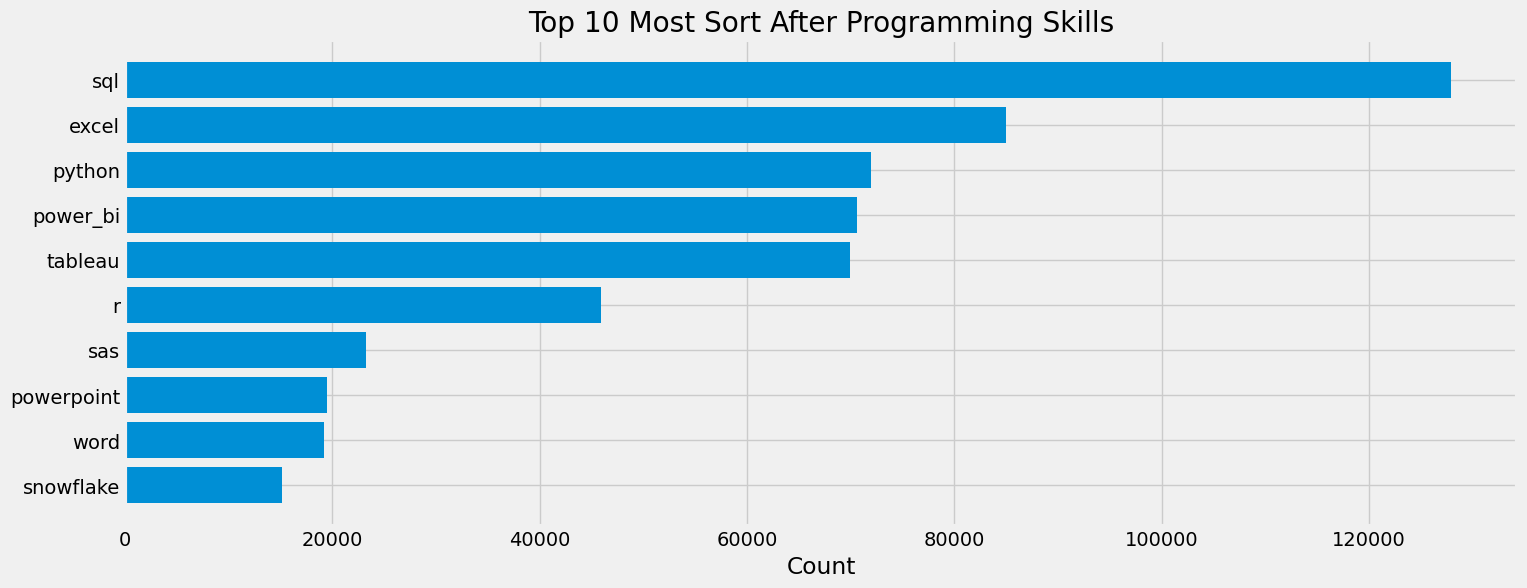

In [54]:
plt.figure(figsize=(16,6))
plt.barh(lang,val)
plt.title('Top 10 Most Sort After Programming Skills')
plt.xlabel('Count')
plt.show()

*Majority of the job posts require SQL as the main skill followed by Excel and the Python.*

***2) What are the top 10 most sort after Data Analyst Titles?***

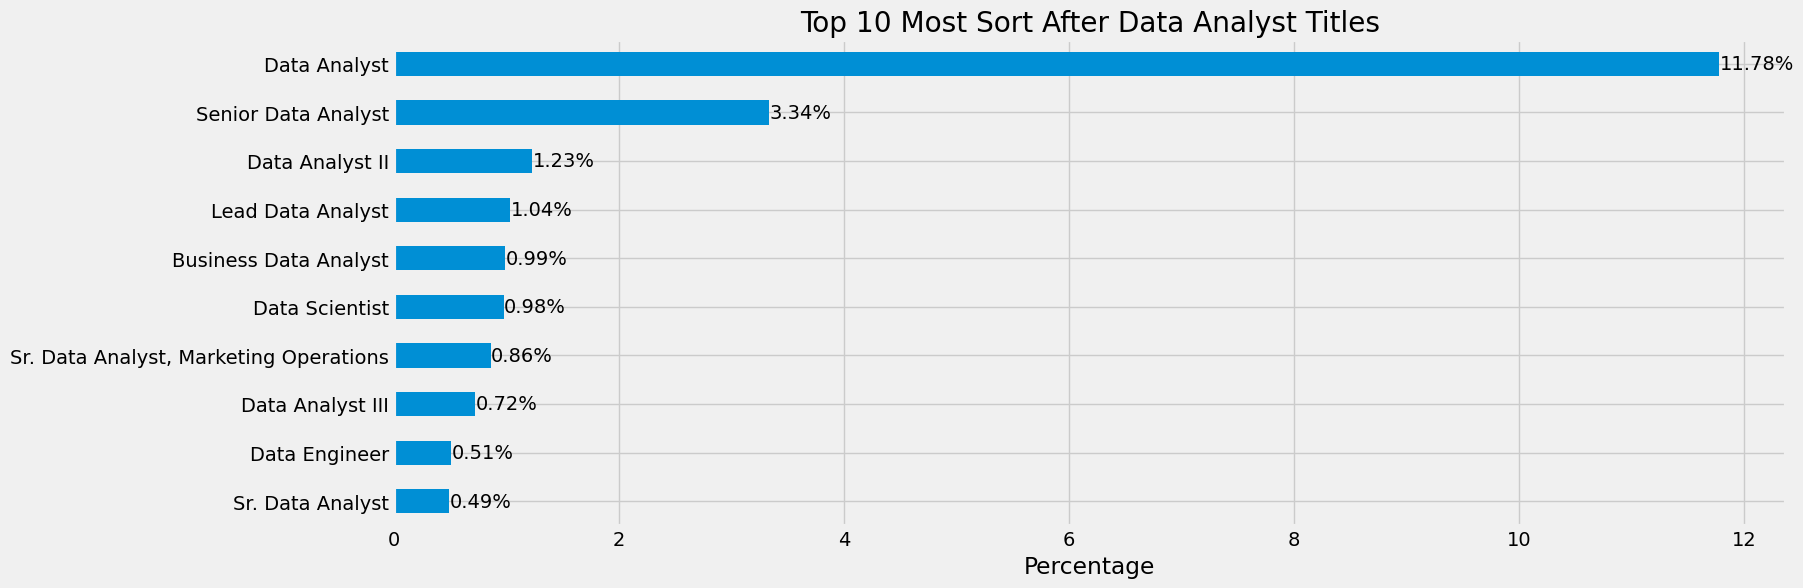

In [55]:
ax=(jobs['job_title'].value_counts(normalize=True)*100).iloc[:10].sort_values().plot(kind='barh',figsize=(16,6),title='Top 10 Most Sort After Data Analyst Titles')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

*Majority of recruiters are interested in Data Analysts compared to Data Engineers.*

***3) What is the most offered contract type for Data Analysts?***

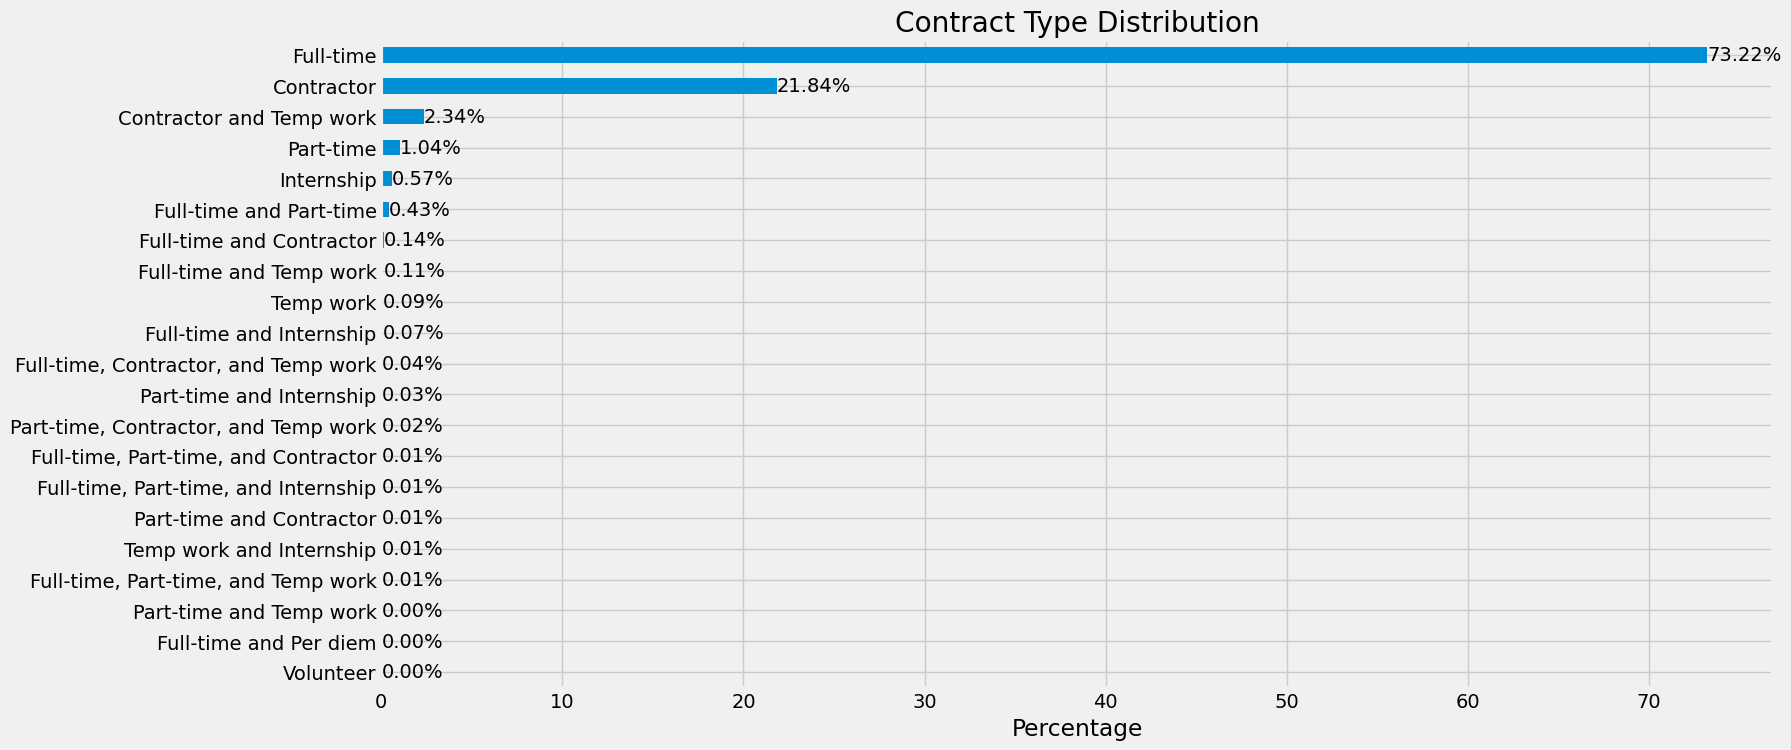

In [56]:
ax=(jobs['contract_type'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,8),title='Contract Type Distribution')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

*Majority of Data Analyst's jobs are full-time.*

***4) Which are the top 10 job platforms with majority of job posts?***

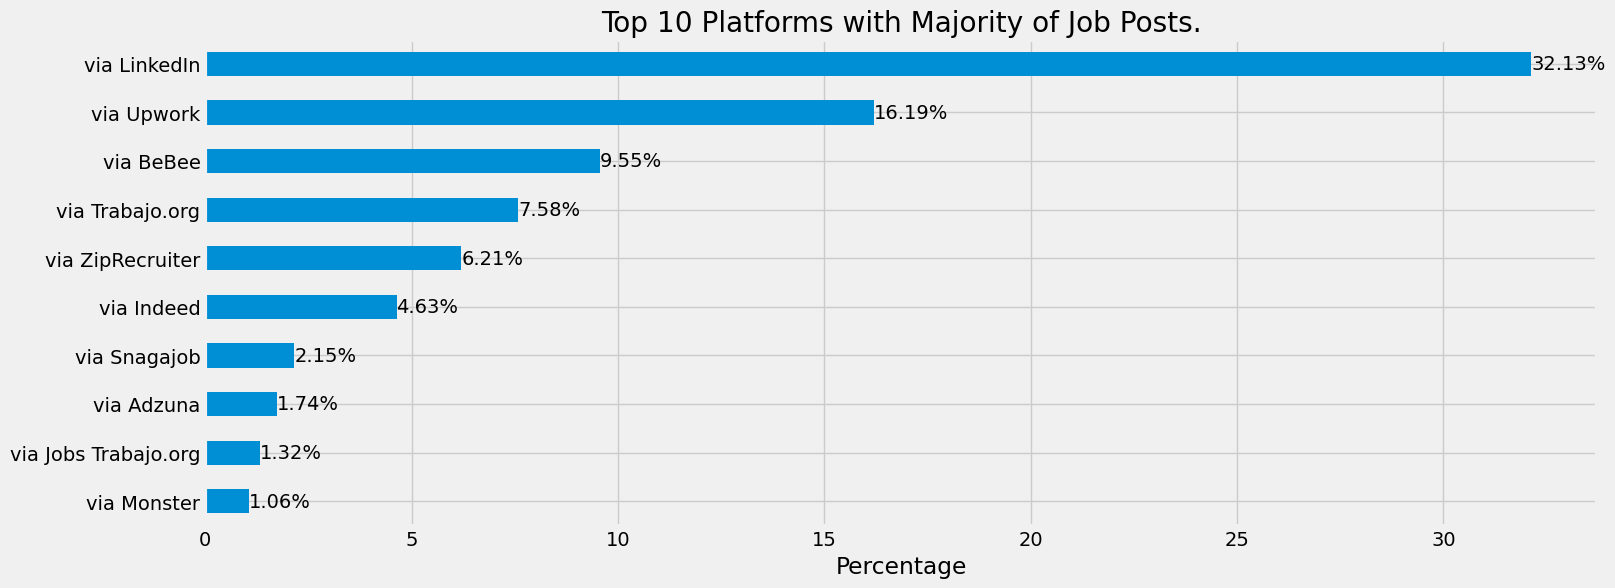

In [57]:
ax=(jobs['platform'].value_counts(normalize=True)*100).iloc[:10].sort_values().plot(kind='barh',figsize=(16,6),title='Top 10 Platforms with Majority of Job Posts.')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

*Majority of recruiters are available on LinkedIn.*

***5) What are the top locations with majority of job posts?***

In [58]:
jobs['location'].value_counts().iloc[:10]

location
Anywhere              111679
United States          66857
Kansas City, MO         8219
Oklahoma City, OK       7314
Jefferson City, MO      5675
Bentonville, AR         3364
Tulsa, OK               3053
Wichita, KS             2691
Overland Park, KS       2216
Topeka, KS              2004
Name: count, dtype: int64

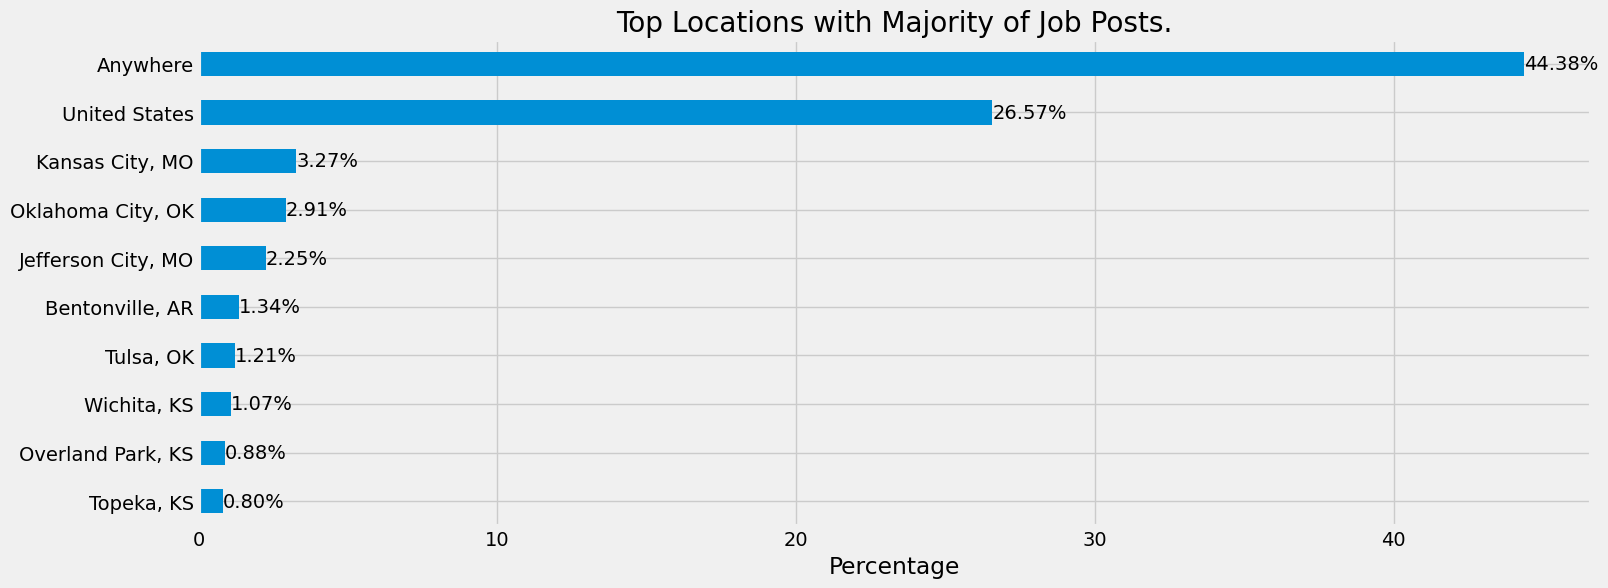

In [59]:
ax=(jobs['location'].value_counts(normalize=True)*100).iloc[:10].sort_values().plot(kind='barh',figsize=(16,6),title='Top Locations with Majority of Job Posts.')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

*A greater percentage of Data Analyst's job posts are available globally.*

***6) What are the top search locations for Data Analyst Roles?***

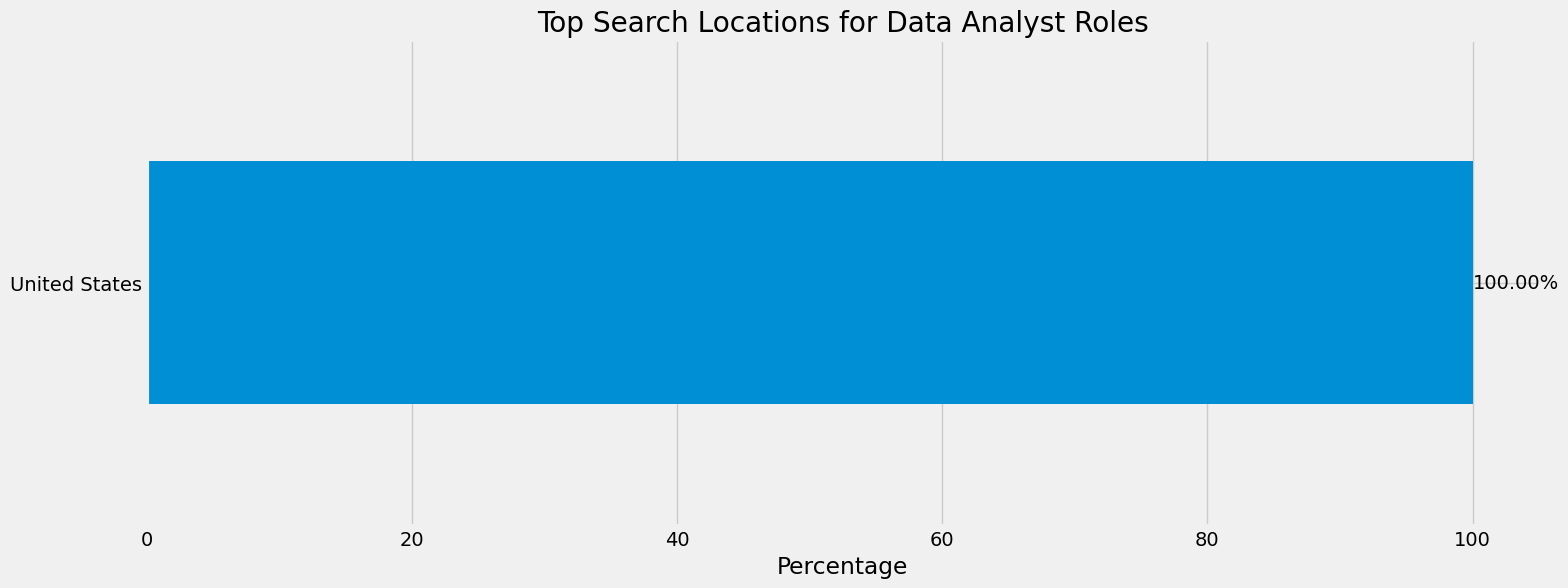

In [60]:
ax=(jobs['search_location'].value_counts(normalize=True)*100).iloc[:10].sort_values().plot(kind='barh',figsize=(16,6),title='Top Search Locations for Data Analyst Roles')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

***7) What is the Average Yearly Salary of A Data Analyst?***

In [61]:
jobs_yearly=jobs.loc[(jobs['average_yearly_salary'].notna())]

*i) Mean*

In [62]:
print(f"Average Yearly Salary : ${jobs_yearly['average_yearly_salary'].mean():,.2f}")

Average Yearly Salary : $334,980.34


*ii) Trimmed Mean*

In [63]:
from scipy.stats import trim_mean

print(f"Average Yearly Salary : ${trim_mean(jobs_yearly['average_yearly_salary'],0.1):,.2f}")

Average Yearly Salary : $106,823.06


*iii) Median*

In [64]:
print(f"Average Yearly Salary : ${jobs_yearly['average_yearly_salary'].median():,.2f}")

Average Yearly Salary : $96,500.00


In [65]:
jobs['month']=jobs['date'].dt.month 
jobs['year']=jobs['date'].dt.year
jobs['day']=jobs['date'].dt.day